# Task 05: Temporal Planning and Reasoning

0. [Background](#star_wars)
1. [Temporal Plan Description](#temporal_plan_description)
    1. [Understand Temporal Plan Description](#text_description)
    2. [Draw Your Temporal Plan](#graphical_description)
       
2. [Simple Temporal Network](#stn)
    1. [Greedy Scheduling](#greedy)
    2. [Constraint Inference](#inference)
    3. [Constraint Inference from Shortest Path](#shortest_path)
    4. [Weighted Graph Representation](#weighted_graph)
    5. [Complete Floyd Warshall APSP](#apsp)

3. [Scheduling without Search](#no_search)
    1. [Solution by Decomposition](#decomposition)
    2. [Consistency Check](#consistent)
    3. [Flexible Execution](#flexible)

## <a name="star_wars"></a> Background

YOU are an engineer hired by the Generic Space Empire for a project. You have been assigned to a moon space station, the center of controversy through out the galaxy.

Maintenance personnel have noticed that several work stations have been acting up, but have assured the engineering team that “uh, everything’s perfectly all right now”. You, however, suspect something sinister afoot. Could it be sabotage from the Underdog Rebels?

You know that a document for the space station was recently stolen (many Non-Copyrighted Alien spies died), in which several attacks taking advantage of design flaws have been documented. Each attack requires compromising a combination of components, distributed across the workstations. 

While you can not dismantle the workstations to directly inspect the components, you can send a team of diagnosis droids to make observations on the workstations to exactly determine the faulty components. As you perform diagnosis on each workstation, you can update the odds on which type of attack will occur. You must do this in a timely manner, so that you can escape before an attack if necessary, and warn the Big Bad Guy Wearing Black if time permits. 

Let's check whether you have time to warn the Big Bad Guy Wearing Black, or whether you should just try to escape. Let's do this by first understanding timing constraints and checking feasibility, then providing a schedule for the plan! If not, we should understand why it is infeasible too! 

## <a name="temporal_plan_description"></a> Temporal Plan Description
Temporal plans may be described qualitatively when time points are encoded by interval relations. Specifically, the following descriptions are commonly used to describe temporal plans. Knowing how one events interact with another event will let us do the diagnosis, understand the attack and plan an escape! 


<div>
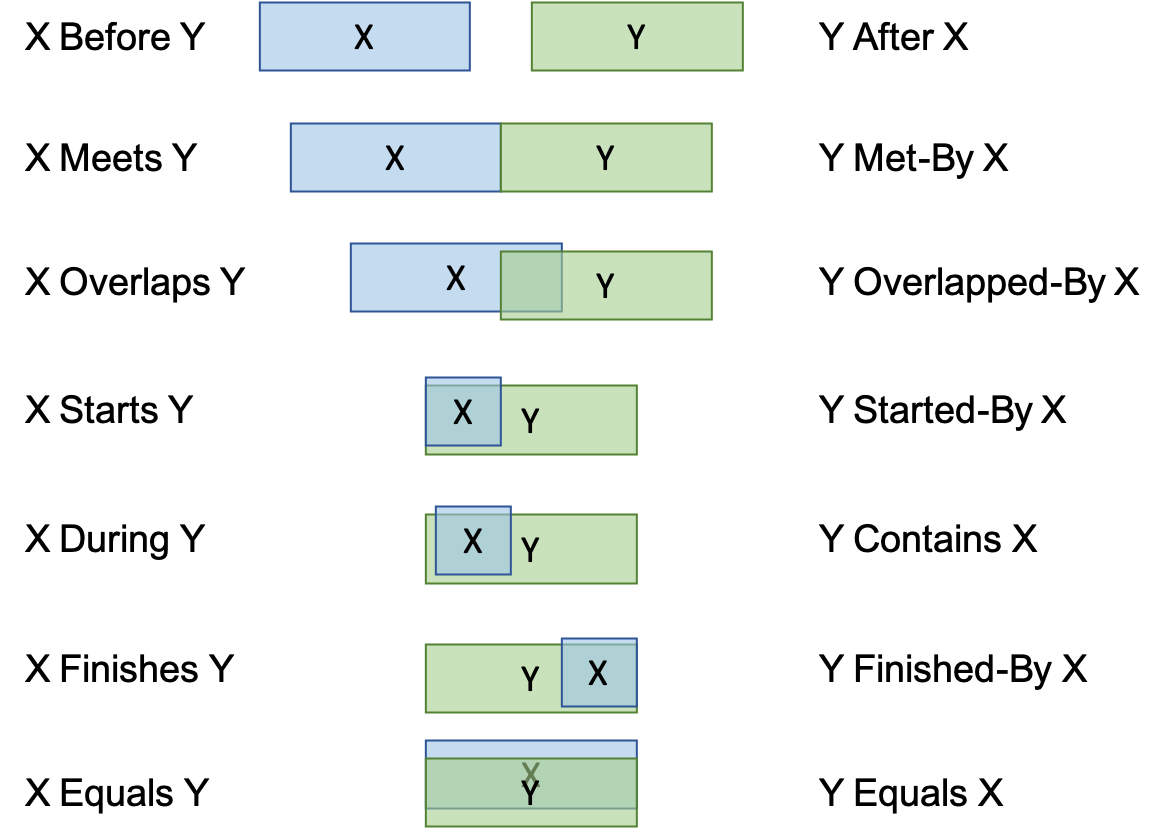
</div>

### <a name="text_description"></a> Understand Temporal Plan Description
Use the same set of descriptors to describe the following temporal graph. This will help us schedule the To-Do list given how each of the constraint with respect to each other. 

<div>
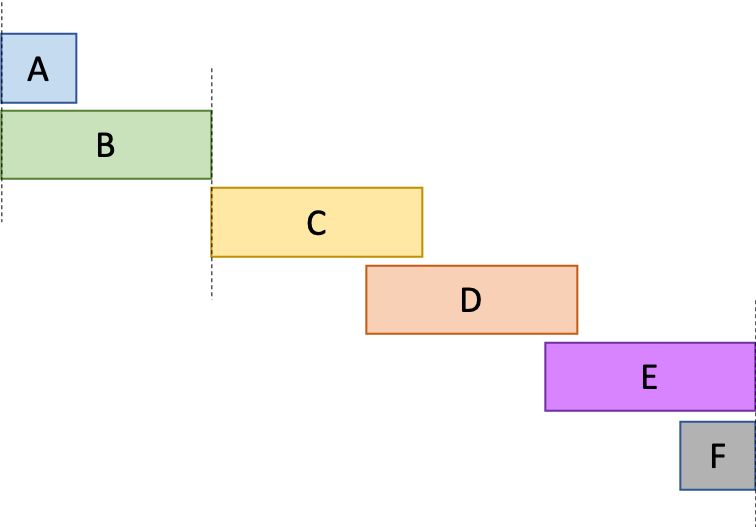
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

1. A starts B 
2. B meets C 
3. C overlaps D 
4. D overlaps E 
5. E finishes F 

### <a name="graphical_description"></a> Draw Your Temporal Plan
Now draw the temporal graphs given the following descriptions. In this case, we can assume that 

A = Diagnosis time

B = Observation period of Droids 

C = Read documentations

D = Update the odds 

E = Check on Big Bad Guy Wearing Black

In this case, the sequence would be

1. A Finishes B 
2. B Meets C 
3. D During C 
4. C Overlaps E 

Make sure the temporal graphs includes the above descriptions and only the above descriptions. No additional descriptions should be required to describe your temporal plan (before descriptors are ignored). 

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
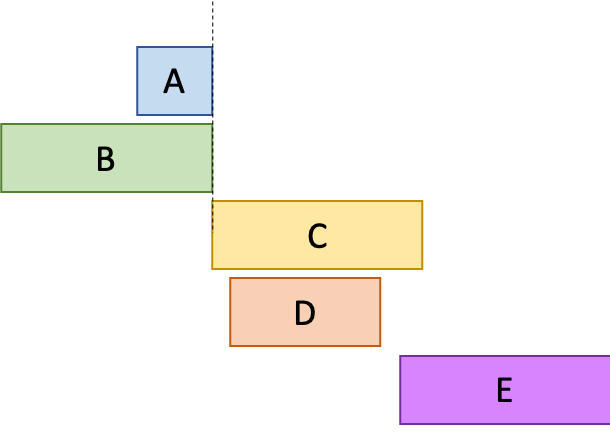
</div>

## <a name="stn"></a> Simple Temporal Network
Simple Temporal Network, abbreviated as STN, describes a set of time point nodes with edges mapping to temporal constraints. It encodes the binary constraints between any two time points. 

Specifically, we know that each task may take a range of time depending on its difficulty. Therefore, we should allow for a range of time points that are acceptable for this particular task. Along with the sequence, we can design this as a STN. 

### <a name="greedy"></a> Direct Greedy Scheduling
Given the following STN, schedule in order of node number. What happened? Is Direct Greedy scheduling a good idea? Why or why not? 

<div>
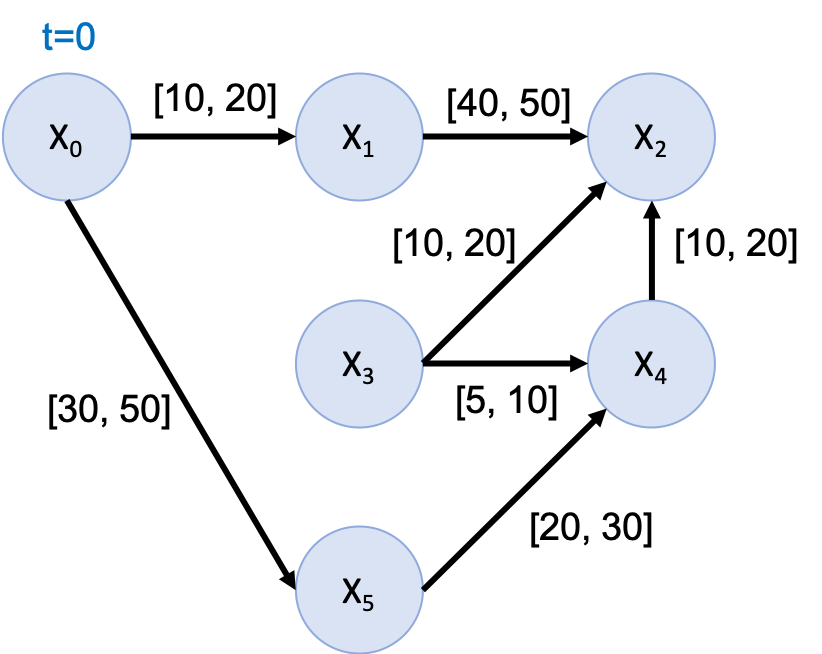
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

In this case, we would assign 
0. $X_0$ = 0 
1. $X_1$ = 20
2. $X_2$ = 70 
3. $X_3$ = 60 
4. $X_4$ = 60 
5. $X_5$ = 40

There exists a conflict from $X_3$ to $X_4$ as both would start at t = 60, but there should be t = [5,10] gap between the two. Direct Greedy Scheduling, in this case, yields invalid solution. That is, without adding inference to the constraint, it is easy to run into situations where assignments are invalid using Direct Greedy Scheduling. Therefore, Direct Greedy Scheduling is not ideal unless inferences have been explicitly explored (as below). 

### <a name="inference"></a> Constraint Inference
To better solve STN, it is important to impose implicit constraints of the network before solving using Greedy scheduling. The arithmetic rules for constraint inference is 

1. Addition 
\begin{equation}
[l_1, u_1] + [l_2, u_2] = [l_1+l_2, u_1+u_2] 
\end{equation}
2. Subtraction 
\begin{equation}
[l_1, u_1] - [l_2, u_2] = [l_1-u_2, u_1-l_2] 
\end{equation} 
3. Intersection 
\begin{equation} 
[l_1, u_1] \cap [l_2, u_2] = [\max(l_1, l_2), \min(u_1, u_2)] 
\end{equation} 

Using the rules above, assign the value of inferred constraint (lines in red) for the STN below. 

<div>
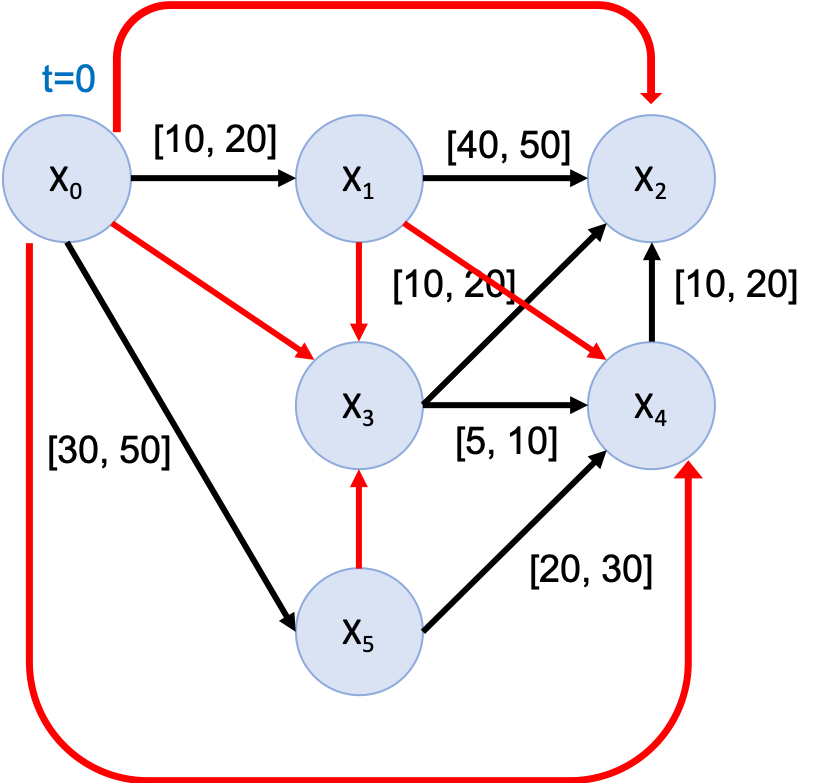
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
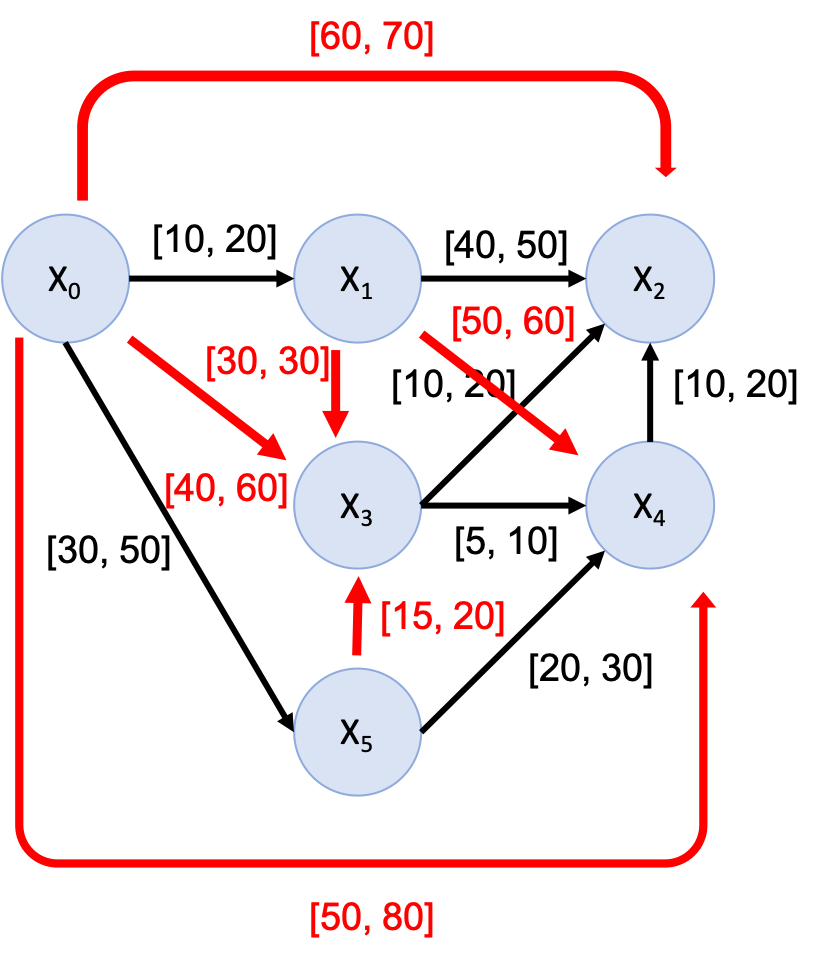
</div>

### <a name="shortest_path"></a> Constraint Inference from Shortest Path
So far, we have been treating STN as constraints. To draw efficient inference, an alternative way to look at constraint inference is to map STN to a weighted graph. In other words, knowing the range of time that a task can take, we can schedule a plan for our problem. 

The algorithm for the mapping is 
1. Upper bounds map to outgoing edges 
2. Lower bounds map to ingoing edges with weights negated 

An example of such conversion is as below 

<div>
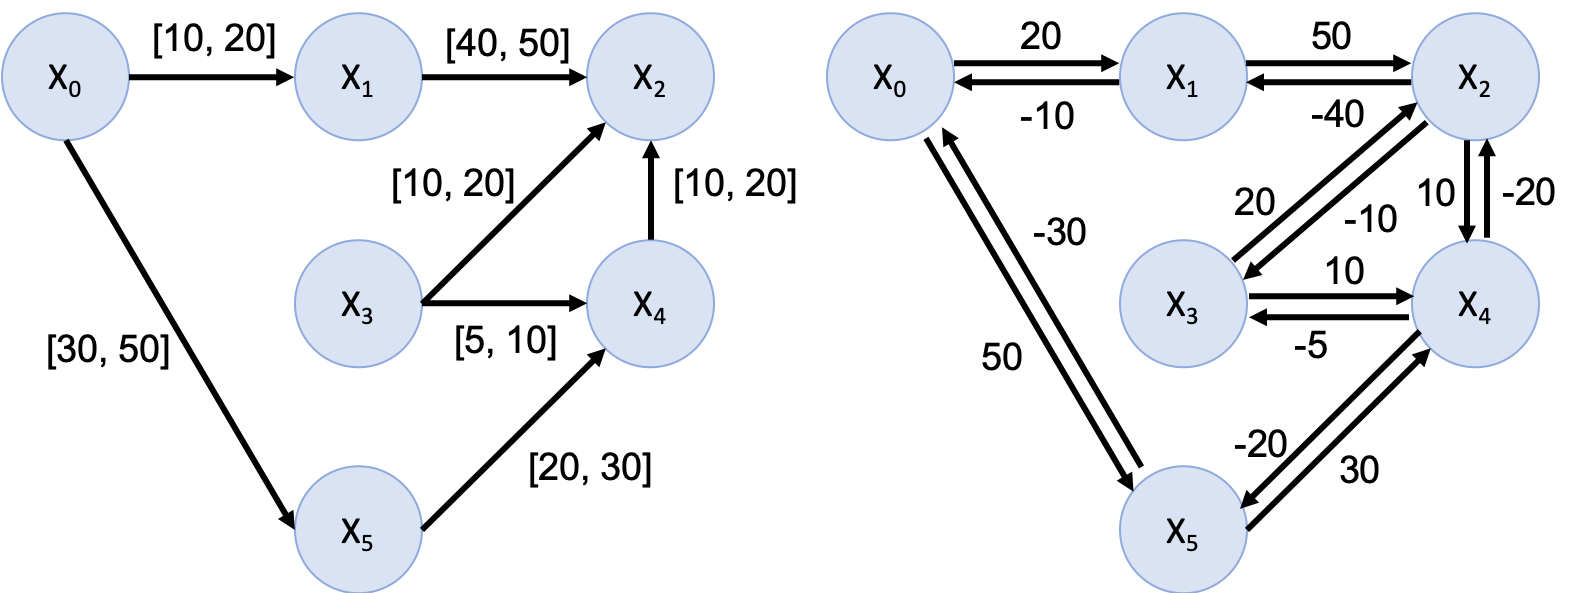
</div>

To efficiently compute shortest path, we can first place the result as adjacency matrix with weighted edges on the entries. Fill out the adjacency matrix below for the example above. 

<div>
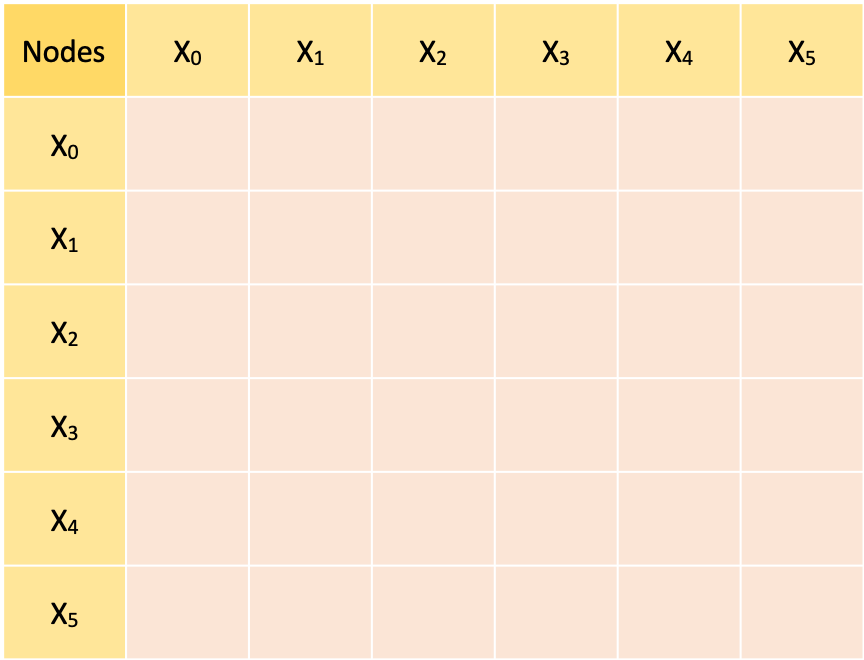
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<div>
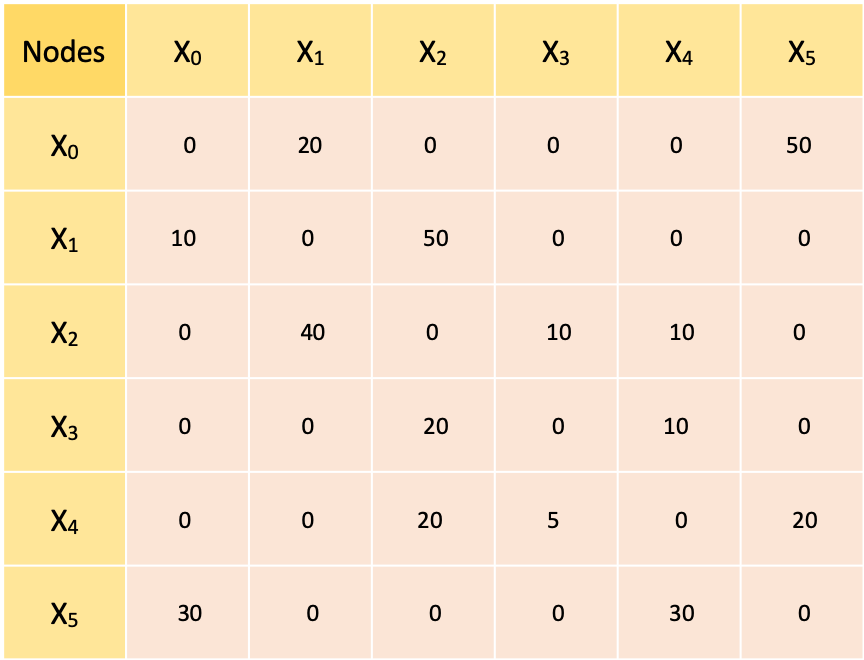
</div>

### <a name="graph"></a> Weighted Graph Representation 
In order to compute shortest paths in a graph, we need a simple graph representation. Fill in the graph class as defined below. 

In [4]:
import numpy as np

class WeightedGraph():
    '''
    Weighted Graph Class 
    May be initialized with an adjacency matrix [List of List]
    '''
    def __init__(self,adjacency_matrix=None):
        self.vertices = set()
        self.edges = set()
        if adjacency_matrix != None: 
            for cell1 in range(len(adjacency_matrix)): 
                for cell2 in range(len(adjacency_matrix[0])): 
                    self.add_vertex(cell1)
                    self.add_vertex(cell2)
                    weight = adjacency_matrix[cell1][cell2]
                    if weight != 0: 
                        self.add_edge(start, end, weight)
    
    def add_edge(self, start, end, weight): 
        self.edges.add((start, end, weight))
    
    def add_vertex(self, vertex):
        self.vertices.add(vertex)

In [8]:
def convert_weighted_graph(stn):
    '''
    Input: graph [Dictionary] - mapping nodeA to nodeB in [l, u] format
    Output: WeightedGraph instance ready for Floyd Warshall 
    '''
    graph = WeightedGraph()
    for n1, n2 in stn: 
        l, u = stn[(n1, n2)]
        
        graph.add_vertex(n1)
        graph.add_vertex(n2)
        graph.add_edge(n1, n2, u)
        graph.add_edge(n2, n1, -l)
    return graph 

In [9]:
graph = {('A', 'B'): [10, 20], 
         ('B', 'C'): [30, 40], 
         ('D', 'C'): [10, 20], 
         ('D', 'E'): [40, 50], 
         ('A', 'E'): [60, 70]}

In [10]:
Sample_Graph = convert_weighted_graph(graph)
print (Sample_Graph.edges)

{('A', 'E', 70), ('B', 'A', -10), ('D', 'C', 20), ('C', 'D', -10), ('E', 'D', -40), ('A', 'B', 20), ('B', 'C', 40), ('E', 'A', -60), ('C', 'B', -30), ('D', 'E', 50)}


In [11]:
graph = {('A', 'B'): [15, 20], 
         ('B', 'C'): [2, 3], 
         ('B', 'D'): [0, np.inf], 
         ('C', 'E'): [0, 1], 
         ('D', 'E'): [5, 10], 
         ('E', 'F'): [5, np.inf], 
         ('F', 'G'): [5, np.inf], 
         ('A', 'G'): [0, 35]}

In [13]:
Droid_Graph = convert_weighted_graph(graph)
print (Droid_Graph.edges)

{('B', 'D', inf), ('C', 'E', 1), ('A', 'G', 35), ('G', 'A', 0), ('E', 'F', inf), ('F', 'E', -5), ('C', 'B', -2), ('D', 'B', 0), ('E', 'C', 0), ('D', 'E', 10), ('G', 'F', -5), ('B', 'C', 3), ('A', 'B', 20), ('B', 'A', -15), ('F', 'G', inf), ('E', 'D', -5)}


### <a name="apsp"></a>  Floyd Warshall All Pairs Shortest Paths 
Use the WeightedGraph class to define the example above. Implement the Floyd Warshall All Pairs Shortest Paths (APSP) algorithm. Return a dictionary where key is the root and goal of the path and the value correspond to a tuple of the shortest path from root to goal and the path weight.

To calculate the shortest path between any two nodes your algorithm should do the following

- first initialize the distance of any node to itself as 0
- for every edge in the graph initialize the shortest path between the start & end nodes as the edges weight
- initialize all remaining distances as infinity
- incrementally tighten all bounds by checking if the path from a -> b -> c is shorter than the path a -> c for all nodes a, b and c

For a more in depth description of the algorithm see the video below.



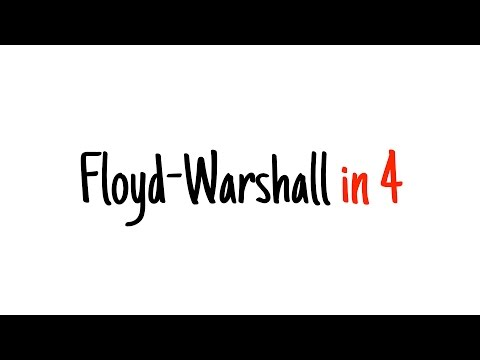

In [23]:
from IPython.display import YouTubeVideo
#HTML('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/4OQeCuLYj-4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
#IFrame('<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/4OQeCuLYj-4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>', width=560, height=315)
YouTubeVideo('4OQeCuLYj-4')

In [33]:
import itertools
def floyd_warshall(weighted_graph): 
    '''
    Input: weighted graph [WeightedGraph instance]
    Output: all pairs shortest paths [Dictionary - {(start, end): ([path], weight)}]
    '''
    #Initialize distance to self as zero
    paths = {(node, node):0 for node in weighted_graph.vertices}
    
    #Initialize distance as edge weight
    for edge in weighted_graph.edges:
        start, end, weight = edge
        paths[(start, end)] = weight
    
    #Initialize remaining distances as inf
    for i,j in itertools.product(list(weighted_graph.vertices), repeat=2):
        if (i,j) not in paths.keys():
            paths[(i,j)] = np.inf
        
    #Take minimum distance over all triangles
    for i,j,k in itertools.product(list(weighted_graph.vertices), repeat=3):
        paths[(i,j)] = min(paths[(i,j)], paths[(i,k)]+paths[(k,j)])
    
    return(paths)

In [36]:
shortest_paths = floyd_warshall(Droid_Graph)
shortest_paths

{('C', 'C'): 0,
 ('A', 'A'): 0,
 ('D', 'D'): 0,
 ('G', 'G'): 0,
 ('E', 'E'): 0,
 ('F', 'F'): 0,
 ('B', 'B'): 0,
 ('B', 'A'): 15,
 ('D', 'E'): 4,
 ('G', 'A'): 0,
 ('E', 'D'): 5,
 ('E', 'F'): 57,
 ('C', 'E'): 1,
 ('A', 'G'): 35,
 ('B', 'C'): 3,
 ('E', 'C'): 0,
 ('C', 'B'): 2,
 ('F', 'G'): 57,
 ('A', 'B'): 20,
 ('B', 'D'): 9,
 ('G', 'F'): 5,
 ('D', 'B'): 0,
 ('F', 'E'): 5,
 ('C', 'A'): 17,
 ('C', 'D'): 6,
 ('C', 'G'): 52,
 ('C', 'F'): 57,
 ('A', 'C'): 23,
 ('A', 'D'): 29,
 ('A', 'E'): 24,
 ('A', 'F'): 40,
 ('D', 'C'): 3,
 ('D', 'A'): 15,
 ('D', 'G'): 50,
 ('D', 'F'): 55,
 ('G', 'C'): 23,
 ('G', 'D'): 29,
 ('G', 'E'): 10,
 ('G', 'B'): 20,
 ('E', 'A'): 17,
 ('E', 'G'): 52,
 ('E', 'B'): 2,
 ('F', 'C'): 5,
 ('F', 'A'): 22,
 ('F', 'D'): 10,
 ('F', 'B'): 7,
 ('B', 'G'): 50,
 ('B', 'E'): 4,
 ('B', 'F'): 55}

## <a name="no_search"></a> Scheduling without Search
Incrementally tighten feasible intervals as committments are made. Using the diagram from Constraint Inference section, select a series of feasible intervals. Include every step of the algorithm to show your work. 

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Using the constraint inference, we can get the series of intervals and propagate as we assign values to each variable

1. $X_0$ = [0, 0], $X_1$ = [10, 20], $X_2$ = [60, 70], $X_3$ = [40, 60], $X_4$ = [50, 60], $X_5$ = [30, 50]
2. $X_0$ = 0, $X_1$ = [10, 20], $X_2$ = [60, 70], $X_3$ = [40, 60], $X_4$ = [50, 60], $X_5$ = [30, 50]
3. $X_0$ = 0, $X_1$ = 15, $X_2$ = [60, 65], $X_3$ = [40, 55], $X_4$ = [50, 55], $X_5$ = [30, 45] 
4. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = [40, 50], $X_4$ = [50, 50], $X_5$ = [30, 40]
5. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = 45, $X_4$ = 50, $X_5$ = [30, 30]
6. $X_0$ = 0, $X_1$ = 15, $X_2$ = 60, $X_3$ = 45, $X_4$ = 50, $X_5$ = 30

In 6 steps, we can find a feasiable solution to the problem. 

### <a name="consistent"></a> Consistency Check
Are the following networks consistent? Explain, for each network, why or why not? 

<div>
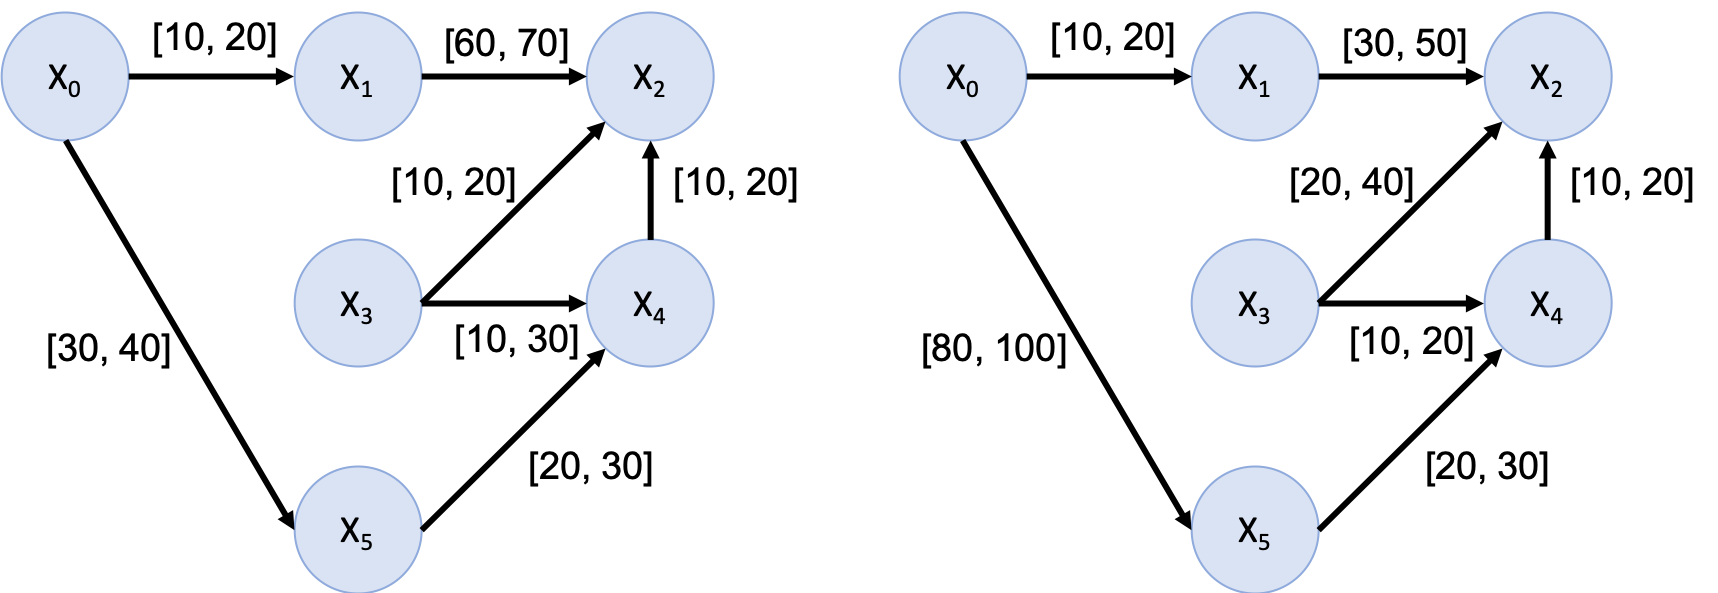
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

<i>Answser:</i>


The first graph is consistent and can satisfied by the following schedule

- x<sub>0</sub> = 0; x<sub>1</sub> = 10; x<sub>2</sub> = 70; x<sub>3</sub> = 60; x<sub>4</sub> = 50; x<sub>5</sub> = 30

The second graph is inconsistent. Looking at the path (x<sub>0</sub>, x<sub>1</sub>, x<sub>2</sub>) 
it can be seen that x<sub>2</sub> must occur between [40,70]
However looking at the path (x<sub>0</sub>, x<sub>5</sub>, x<sub>4</sub>, x<sub>2</sub>) it can been seen that x<sub>2</sub> 
must occur between [110, 150]. Because there is no overlap between 
these ranges there is no time at which x<sub>2</sub> can be scheduled that will
satisfy all constraints.

Implement a consistency check function that determines if a STN, in the form of a weigthed graph, is consistent or not. 

In [9]:
def is_consistent(weighted_graph):
    '''
    Input: weighted graph [WeightedGraph instance]
    Output: consistency [Boolean]
    '''
    shortest_paths = floyd_warshall(weighted_graph)
    for (start,end), weight in shortest_paths.items():
        if start == end and weight < 0:
            return False
    return True

In [10]:
# AssertEqual 

### <a name="flexible"></a> Flexible Execution
If $X_3$ is accidentally started at t=20, how many events are no longer valid? What does the new execution plan look like? 

<div>
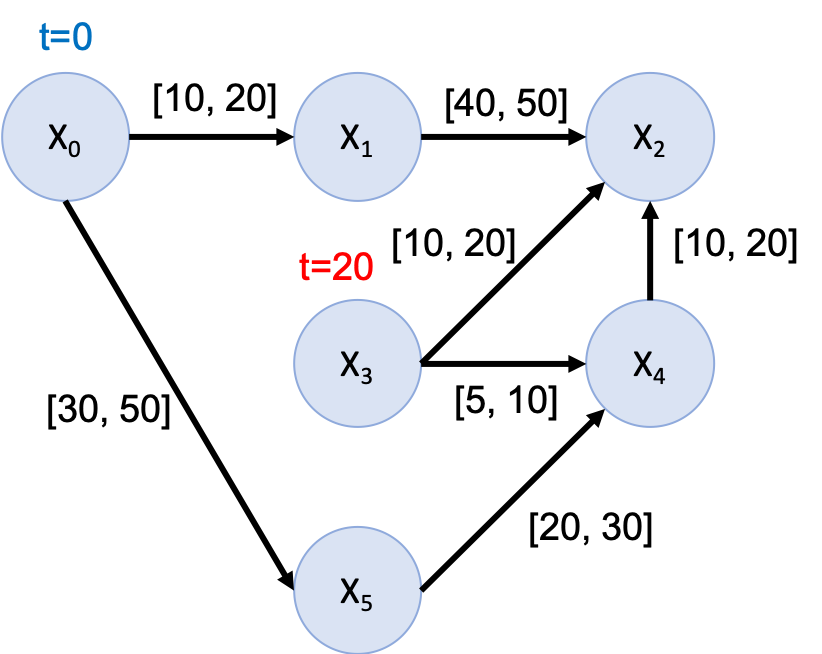
</div>

<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

The two children of X<sub>3</sub> will now both be invalid. 
There is no time at which X<sub>2</sub> and X<sub>4</sub> can be scheduled that
will satify all constraints.


### <a name="FE Implementation"></a> Flexible Execution Implementation
Implement the reformulate plan and flexible execution functions.

Reformulate plan should take as input an accident that will occur during execution, a weighted graph of time constraints, and a scheduled plan and return as output a new valid plan after observing the error at time t or None if the constraints can no longer be satisfied.

Flexible execution should take a sequential list of accidents and return a list of updated plans as execution proceeds.


In [5]:
def reformulate_plan(weighted_graph, accident, scheduled_plan):
    '''
    Input: weighted_graph [WeightedGraph instance] 
           accident Tuples - (node, execution time)
           scheduled plan [Dictionary - {node: execution time}]
    Output: new plan [Dictionary - {node: execution time}]
            time difference [Int]
    '''    
    current_time = accident[1]
    
    #Add dummy node representing t0
    weighted_graph.add_vertex('t0')
    
    #Add hard constraint representing accidentally executed node
    weighted_graph.add_edge('t0', accident[0], accident[1])
    weighted_graph.add_edge(accident[0], 't0', -1*accident[1])
    
    #Add hard constraint representing nodes which have already been executed
    for node, execution_time in scheduled_plan:
        if execution_time < current_time:
            weighted_graph.add_edge('t0', node, execution_time)
            weighted_graph.add_edge(node, 't0', -1*execution_time)

    #Solve for shortest paths using floyd warshall and check for consistency
    shortest_paths = floyd_warshall(weighted_graph)
    if not is_consistent(shortest_paths):
        return(None)
    
    #Extract new plan from shortest paths
    new_plan = {}
    for node in scheduled_plan:
        new_plan[node] = -1 * shortest_paths[(node, 't0')]
    
    return(new_plan)
        
    

def flexible_execution(weighted_graph, accidents, scheduled_plan):
    '''
    Input: weighted_graph [WeightedGraph instance] 
           accidents [List of Tuples - [(node, execution time)]]
           scheduled plan [Dictionary - {node: execution time}]
    Output: new plan [Dictionary - {node: execution time}]
            time difference [Int]
    '''
    plans = []
    for accident in accidents:
        scheduled_plan = reformulate_plan(weighted_graph, accident, scheduled_plan)
        if scheduled_plan == None:
            break
        plans.append(scheduled_plan.copy())
    return(plans)

In [9]:
# AssertEqual